<a href="https://colab.research.google.com/github/bino-m/advanced_classification_zm6_project/blob/main/Climate_Sentiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#                                       *Climate* *Change* *Sentiment* *Analysis*



---











Add a theme image


#***Table of Contents***

Introduction

Outline

Installed Libraries

Import Libraries 

1. A Glimpse of Datasets

2. Data description
  

3. Preprocessing
  
  Create copy

  3.1.Data cleaning

  * Find Entities
  
  * Lemmatization
    
  3.2. Explanatory Data Analysis

  * Sentiment distribution
  * Tweet length distribution
  * Sentiment distribution
  * Climate change popular words
  * Climate change popular hashtags
  * Climate change popular named entities
  * News bulletins
  * People and places

4. Machine Learning

  4.1. Train-validation split

  4.2. Train models

5. Model evaluation

  5.1. Modeling

  * Model #1 

  * Model #2

  * Model #3

  * Model #4

  * Model #5

  5.2. Model Selection

  * Models score comparison

  * Hyperparameter tuning

  5.3. Model Improvement(If any)

Submission

Conclusion

Acknowledgements

#**Introduction**

Add intro here

#**Outline**

ADD outline here

#**Installed Libraries**

**spaCy** is designed specifically for production use and helps build applications that process and “understand” large volumes of text. It can be used to build information extraction or natural language understanding systems, or to pre-process text for deep learning.

The **Natural Language Toolkit** is a suite of libraries and programs for symbolic and statistical natural language processing (NLP) for English written in the Python programming language.

In [ ]:
!pip install spacy
!pip install NLTK
!pip install comet_ml

     |████████████████████████████████| 276kB 6.8MB/s 
     |████████████████████████████████| 61kB 8.0MB/s 
     |████████████████████████████████| 71kB 7.0MB/s 
     |████████████████████████████████| 532kB 11.6MB/s 
  Created wheel for configobj: filename=configobj-5.0.6-cp37-none-any.whl size=34547 sha256=1ab29898d9a60c7b6b1311f065018f013604c8684e680086062c9b72b872dd71
  Stored in directory: /root/.cache/pip/wheels/f1/e4/16/4981ca97c2d65106b49861e0b35e2660695be7219a2d351ee0
Successfully built configobj


#**Import Libraries**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
from numpy import arange
import re           # "re", regular expression module included with Python primarily used for string searching and manipulation
                    # Also used frequently for web page "Scraping" (extract large amount of data from websites)
import spacy.cli
import nltk         # The Natural Language Toolkit

#Language libraries for text cleaning
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import word_tokenize

nlp = spacy.load('en_core_web_sm')

from wordcloud import WordCloud 

#Resampling libraries
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE

#Machine Learning Models
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.svm import LinearSVC, SVC
from sklearn.linear_model import SGDClassifier, LinearRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.gaussian_process import GaussianProcessClassifier

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import  KFold

#Matrix measurement
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score, precision_score, recall_score

# from google.colab import drive

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
spacy.cli.download('en_core_web_sm')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
stop = nltk.corpus.stopwords.words('english')

#**Data description**

Add data description, i.e. source of data, size of data, feature description

#**A Glimpse of Datasets**



In [ ]:
train = pd.read_csv('https://raw.githubusercontent.com/ThobaniMwandla/advanced_classification_zm6_project/main/data/train.csv')
train.head(10)

,sentiment,message,tweetid
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221
1,1,It's not like we lack evidence of anthropogeni...,126103
2,2,RT @RawStory: Researchers say we have three ye...,698562
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954
5,1,Worth a read whether you do or don't believe i...,425577
6,1,RT @thenation: Mike Pence doesn’t believe in g...,294933
7,1,RT @makeandmendlife: Six big things we can ALL...,992717
8,1,@AceofSpadesHQ My 8yo nephew is inconsolable. ...,664510
9,1,RT @paigetweedy: no offense… but like… how do ...,260471


In [ ]:
train.shape

(15819, 3)

In [ ]:
test = pd.read_csv('https://raw.githubusercontent.com/ThobaniMwandla/advanced_classification_zm6_project/main/data/test_with_no_labels.csv')
test.head(10)

,message,tweetid
0,Europe will now be looking to China to make su...,169760
1,Combine this with the polling of staffers re c...,35326
2,"The scary, unimpeachable evidence that climate...",224985
3,@Karoli @morgfair @OsborneInk @dailykos \nPuti...,476263
4,RT @FakeWillMoore: 'Female orgasms cause globa...,872928
5,RT @nycjim: Trump muzzles employees of several...,75639
6,@bmastenbrook yes wrote that in 3rd yr Comp Sc...,211536
7,RT @climatehawk1: Indonesian farmers weather #...,569434
8,RT @guardian: British scientists face a ‘huge ...,315368
9,Aid For Agriculture | Sustainable agriculture ...,591733


In [ ]:
test.shape

(10546, 2)

#**3. Preprocessing**

##**Create copy**

In [ ]:
#Create copy of train and test tests


##**3.1. Data cleaning**



*   **Remove Noise**




> Cleaned the tweet messages by creating a function that makes all tweets lower-case, then removed links and tweeter handles, punctuation marks, white spaces, and hashtags.





In [ ]:
def clean_text(df):
  item = 0
  for tweet in df['message']:
    tweet = tweet.lower()
    tweet = re.sub(r'http\S+', '', tweet)
    tweet = re.sub(r'@\S+', '', tweet)
    tweet = re.sub(r'[^\w\s]', '', tweet)
    tweet = tweet.lstrip()
    tweet = tweet.rstrip()
    tweet = tweet.replace('  ', ' ')
    df.loc[item, 'message'] = tweet
    item += 1

In [ ]:
clean_text(train)
train

,sentiment,message,tweetid
0,1,polyscimajor epa chief doesnt think carbon dio...,625221
1,1,its not like we lack evidence of anthropogenic...,126103
2,2,rt researchers say we have three years to act ...,698562
3,1,todayinmaker wired 2016 was a pivotal year in ...,573736
4,1,rt its 2016 and a racist sexist climate change...,466954
...,...,...,...
15814,1,rt they took down the material on global warmi...,22001
15815,2,rt how climate change could be breaking up a 2...,17856
15816,0,notiven rt nytimesworld what does trump actual...,384248
15817,-1,rt hey liberals the climate change crap is a h...,819732


In [ ]:
clean_text(test)
test

,message,tweetid
0,europe will now be looking to china to make su...,169760
1,combine this with the polling of staffers re c...,35326
2,the scary unimpeachable evidence that climate ...,224985
3,putin got to you too jill \ntrump doesnt belie...,476263
4,rt female orgasms cause global warming\nsarcas...,872928
...,...,...
10541,rt brb writing a poem about climate change cli...,895714
10542,2016 the year climate change came home during ...,875167
10543,rt pacific countries positive about fiji leadi...,78329
10544,rt youre so hot you must be the cause for glob...,867455


* **Remove Stopwords**



> Removed all stopwords by importing ....



In [ ]:
def remove_stopwords(df):
    new_stopwords = stopwords.words('english')
    row = 0
    for tweet in df['message']:
      tweet = word_tokenize(tweet)
      tweet = [word for word in tweet if not word in new_stopwords]
      tweet = ' '.join(tweet)

      df.loc[row, 'message'] = tweet
      row += 1

    return df

In [ ]:
remove_stopwords(train)

,sentiment,message,tweetid
0,1,polyscimajor epa chief doesnt think carbon dio...,625221
1,1,like lack evidence anthropogenic global warming,126103
2,2,rt researchers say three years act climate cha...,698562
3,1,todayinmaker wired 2016 pivotal year war clima...,573736
4,1,rt 2016 racist sexist climate change denying b...,466954
...,...,...,...
15814,1,rt took material global warming lgbt rights he...,22001
15815,2,rt climate change could breaking 200millionyea...,17856
15816,0,notiven rt nytimesworld trump actually believe...,384248
15817,-1,rt hey liberals climate change crap hoax ties ...,819732


In [ ]:
remove_stopwords(test)

,message,tweetid
0,europe looking china make sure alone fighting ...,169760
1,combine polling staffers climate change womens...,35326
2,scary unimpeachable evidence climate change al...,224985
3,putin got jill trump doesnt believe climate ch...,476263
4,rt female orgasms cause global warming sarcast...,872928
...,...,...
10541,rt brb writing poem climate change climatechan...,895714
10542,2016 year climate change came home hottest yea...,875167
10543,rt pacific countries positive fiji leading glo...,78329
10544,rt youre hot must cause global warming aldubla...,867455


* **Find named entities**

In [ ]:
def entities(df):
    indx = 0

    for tweet in df['message']:
      tweet = nlp(tweet)

      for entity in tweet.ents:
        df.loc[indx, 'message'] = df.loc[indx, 'message'].replace(str(entity.text), str(entity.label_))

      indx += 1

      return df

In [ ]:
entities(train)

,sentiment,message,tweetid
0,1,ORG chief doesnt think carbon dioxide main cau...,625221
1,1,like lack evidence anthropogenic global warming,126103
2,2,rt researchers say three years act climate cha...,698562
3,1,todayinmaker wired 2016 pivotal year war clima...,573736
4,1,rt 2016 racist sexist climate change denying b...,466954
...,...,...,...
15814,1,rt took material global warming lgbt rights he...,22001
15815,2,rt climate change could breaking 200millionyea...,17856
15816,0,notiven rt nytimesworld trump actually believe...,384248
15817,-1,rt hey liberals climate change crap hoax ties ...,819732


In [ ]:
entities(test)

,message,tweetid
0,LOC looking GPE make sure alone fighting clima...,169760
1,combine polling staffers climate change womens...,35326
2,scary unimpeachable evidence climate change al...,224985
3,putin got jill trump doesnt believe climate ch...,476263
4,rt female orgasms cause global warming sarcast...,872928
...,...,...
10541,rt brb writing poem climate change climatechan...,895714
10542,2016 year climate change came home hottest yea...,875167
10543,rt pacific countries positive fiji leading glo...,78329
10544,rt youre hot must cause global warming aldubla...,867455


* **Lemmantization**

In [ ]:
def lemmatize_tweet(df):
    df_index = 0

    for tweet in df['message']:
      tweet = nlp(tweet)
      
      for token in tweet:
        df.loc[df_index, 'message'] = df.loc[df_index, 'message'].replace(str(token.text), str(token.lemma_))

      df_index += 1

      return df

In [ ]:
lemmatize_tweet(train)

,sentiment,message,tweetid
0,1,ORG chief donot think carbon dioxide main caus...,625221
1,1,like lack evidence anthropogenic global warming,126103
2,2,rt researchers say three years act climate cha...,698562
3,1,todayinmaker wired 2016 pivotal year war clima...,573736
4,1,rt 2016 racist sexist climate change denying b...,466954
...,...,...,...
15814,1,rt took material global warming lgbt rights he...,22001
15815,2,rt climate change could breaking 200millionyea...,17856
15816,0,notiven rt nytimesworld trump actually believe...,384248
15817,-1,rt hey liberals climate change crap hoax ties ...,819732


In [ ]:
lemmatize_tweet(test)

,message,tweetid
0,LOC look GPE make sure alone fight climate change,169760
1,combine polling staffers climate change womens...,35326
2,scary unimpeachable evidence climate change al...,224985
3,putin got jill trump doesnt believe climate ch...,476263
4,rt female orgasms cause global warming sarcast...,872928
...,...,...
10541,rt brb writing poem climate change climatechan...,895714
10542,2016 year climate change came home hottest yea...,875167
10543,rt pacific countries positive fiji leading glo...,78329
10544,rt youre hot must cause global warming aldubla...,867455


##**3.2. Exploratory Data Analysis**


> We then analysed the data, how it is structured, distribution, stats....



* **Sentiment distribation**

In [ ]:
train.sentiment.value_counts()

 1    8530
 2    3640
 0    2353
-1    1296
Name: sentiment, dtype: int64

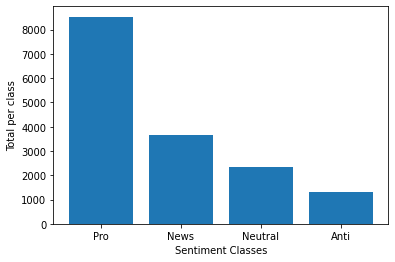

In [ ]:
counts = train["sentiment"].value_counts()
plt.bar(range(len(counts)), counts)
plt.xticks([0, 1, 2, 3], ['Pro', 'News', 'Neutral', 'Anti'])

plt.ylabel("Total per class")
plt.xlabel("Sentiment Classes")
plt.show()

* **Tweet length distribution**

In [ ]:
#Code

* **Climate change popular words**

> Below we show some of the words used in the different tweets under each class.




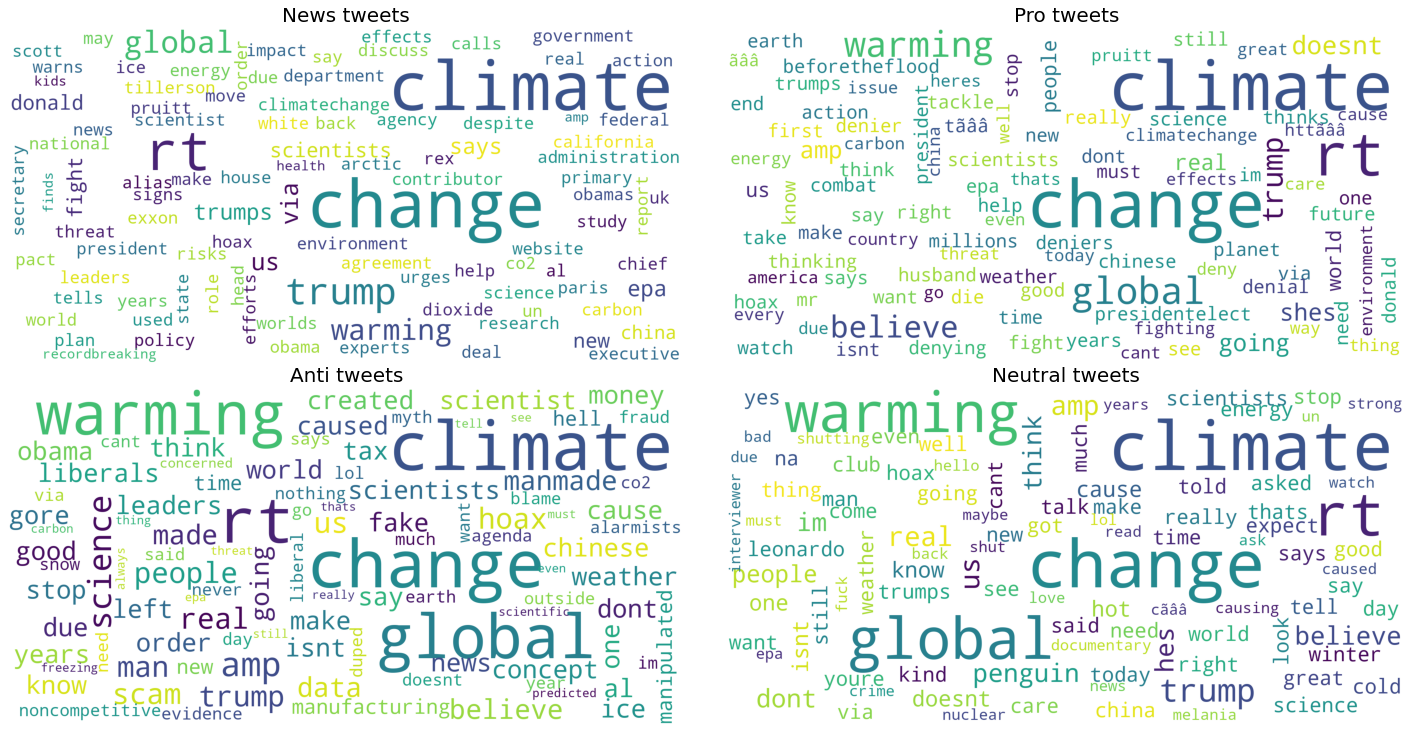

In [ ]:
#word clouds
news = train[train['sentiment'] == 2]['message']
pro = train[train['sentiment'] == 1]['message']
neutral =train[train['sentiment'] == 0]['message']
Anti = train[train['sentiment'] ==-1]['message']


news = [word for line in news for word in line.split()]
pro = [word for line in pro for word in line.split()]
neutral = [word for line in neutral for word in line.split()]
Anti= [word for line in Anti for word in line.split()]

news = WordCloud(
    background_color='white',
    max_words=100,
    max_font_size=40,
    scale=5,
    random_state=1,
    collocations=False,
    normalize_plurals=False
).generate(' '.join(news))

pro = WordCloud(
    background_color='white',
    max_words=100,
    max_font_size=40,
    scale=5,
    random_state=1,
    collocations=False,
    normalize_plurals=False
).generate(' '.join(pro))



neutral = WordCloud(
    background_color='white',
    max_words=100,
    max_font_size=40,
    scale=5,
    random_state=1,
    collocations=False,
    normalize_plurals=False
).generate(' '.join(neutral))


Anti = WordCloud(
    background_color='white',
    max_words=100,
    max_font_size=40,
    scale=5,
    random_state=1,
    collocations=False,
    normalize_plurals=False
).generate(' '.join(Anti))


fig, axs = plt.subplots(2, 2, figsize = (20, 10))
fig.tight_layout(pad = 0)

axs[0, 0].imshow(news)
axs[0, 0].set_title('News tweets', fontsize = 20)
axs[0, 0].axis('off')

axs[0, 1].imshow(pro)
axs[0, 1].set_title('Pro tweets', fontsize = 20)
axs[0, 1].axis('off')


axs[1, 0].imshow(Anti)
axs[1, 0].set_title('Anti tweets', fontsize = 20)
axs[1, 0].axis('off')

axs[1, 1].imshow(neutral)
axs[1, 1].set_title('Neutral tweets', fontsize = 20)
axs[1, 1].axis('off')

plt.savefig('joint_cloud.png')

* **Climate change popular hashtags**

In [ ]:
# code showing cloud per sentiment and bargraphs per sentiment

* **Climate change popular named entities**

In [ ]:
# code showing cloud per sentiment and bargraphs

* **News bulletin**

In [ ]:
# code showing cloud for news channels

* **People and places**

In [ ]:
#code showing tweeters/tweeter mentions bargraphs and cloud per sentiment

#**4. Machine Learning**



> [text explaing approach, models to build, and other important processes like metric measurement or used.]



##**4.1. Train-test split**

In [ ]:
#code

##**4.2. Train Models**

In [ ]:
#code

#**5. Model Evaluation**

##**5.1. Modeling**

* **Mode1 #1**

In [ ]:
#Code for Model #1

* **Model #2**

In [ ]:
#code for model #2

{... and so on and so on}

##**5.2. Model Selection**

* **Models score comparison**

In [ ]:
#create a bar graph showing [] scores for all models

* **Hyperparameter tuning of best model**

In [ ]:
#code for hyperparameter

#**Submission**

In [ ]:
#all necessary codes

In [ ]:
#all necessary codes

#**Conclusion**

Conclude on results, how the prediction performed, what can be improved or whatever you see fit

#**References**

References of sources of information (can be informal)